In [2]:
#Prophet model for time series forecast
from prophet import Prophet



#Data processing
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


c:\GitHub\Machine-Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

#bcm = pd.read_csv(r"C:\Users\Parsazh\Documents\GitHub\Machine-Learning\data\BCM_DATA.csv",index_col=[0],parse_dates=[0])
bcm = pd.read_csv(r"..\data\BCM_DATA.csv",index_col=[0],parse_dates=[0])


In [4]:
train_end_date = pd.to_datetime('2024-03-31')

bcm_train = bcm.loc[bcm.index <= train_end_date].copy()
bcm_test = bcm.loc[bcm.index > train_end_date].copy()

print(bcm_train.tail())

# Format data for prophet model using ds and y
bcm_train_prophet = bcm_train["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
bcm_test_prophet = bcm_test["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
#print(bcm_train_prophet.head())


            FISCAL_YEAR  ACCOUNTING_PERIOD    TOT_PAID   BUDGET_AMT  NBR_CASE  \
ACC_MONTH                                                                       
2023-11-30         2023                  8  2000769.80  2878958.810        45   
2023-12-31         2023                  9  2054317.80  2104117.680        36   
2024-01-31         2023                 10  2576562.57  2843154.100        53   
2024-02-29         2023                 11  2389917.93  3079523.660        58   
2024-03-31         2023                 12  1613714.32  2926001.911        54   

            NBR_MURDER  NBR_OTHER  
ACC_MONTH                          
2023-11-30          19         26  
2023-12-31          10         26  
2024-01-31          22         31  
2024-02-29          22         36  
2024-03-31          23         31  


In [5]:

#model fit:
model = Prophet()
model.fit(bcm_train_prophet)

# Predict on test set with model

bcm_test_fcst = model.predict(bcm_test_prophet)
bcm_train_fcst= model.predict(bcm_train_prophet) # fit the model on training dataset
#print(bcm_test_fcst.head())
#print(bcm_train_fcst.head())

20:13:10 - cmdstanpy - INFO - Chain [1] start processing
20:13:11 - cmdstanpy - INFO - Chain [1] done processing


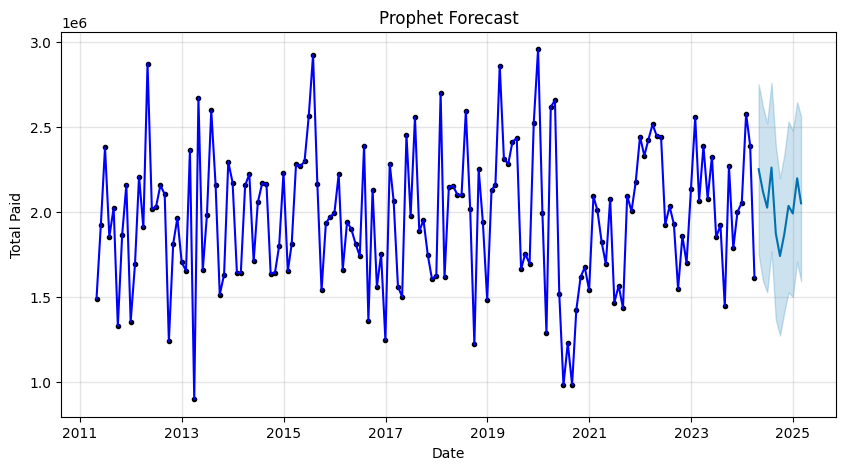

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(bcm_test_fcst, ax=ax, xlabel='Date', ylabel='Total Paid')
ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='b')

ax.set_title('Prophet Forecast')


#fig = model.plot_components(bcm_test_fcst)

plt.show()




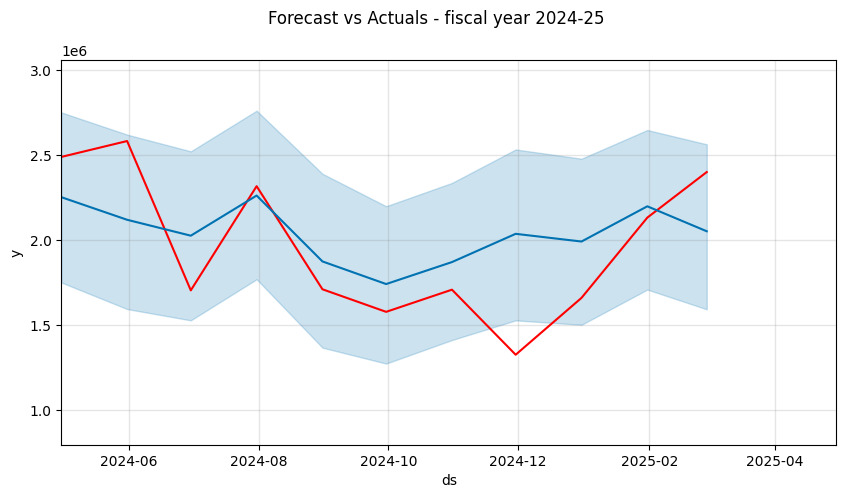

In [7]:

#plot one fiscal year

lower_bound = pd.to_datetime('2024-04-30')  # Ensure correct format
upper_bound = pd.to_datetime('2025-04-30')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(bcm_test.index, bcm_test['TOT_PAID'], color='r')
fig = model.plot(bcm_test_fcst, ax=ax)
# Set x-axis limits with datetime values
ax.set_xbound(lower=lower_bound, upper=upper_bound)
#ax.set_ylim(0, 60000)
plot = plt.suptitle('Forecast vs Actuals - fiscal year 2024-25')
plt.show()


Text(0.5, 1.0, 'Forecast vs Actuals - Basemodel Simulation')

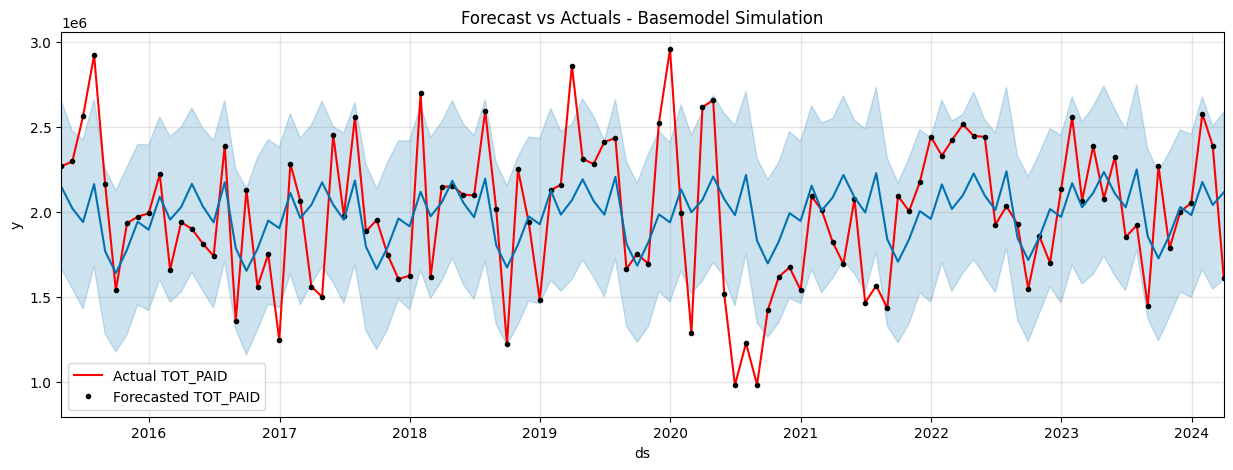

In [8]:
#plot the forecast with the actual ternd in trained dataset

# Plot the forecast with the actuals

lower_bound = pd.to_datetime('2015-04-30')  # Ensure correct format
upper_bound = pd.to_datetime('2024-03-31')

f, ax = plt.subplots(figsize=(15, 5))
ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='r')
fig = model.plot(bcm_train_fcst, ax=ax)
ax.set_xbound(lower=lower_bound, upper=upper_bound)
# Add legend
ax.legend(['Actual TOT_PAID', 'Forecasted TOT_PAID'])
ax.set_title('Forecast vs Actuals - Basemodel Simulation')
#plt.show()



In [9]:
#check the model's accuracy

mean_squared_error_b = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat']))

mean_absolute_error=mean_absolute_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat'])
mean_absolute_percentage_error=mean_absolute_percentage_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat'])



print("mean_squared_error:", mean_squared_error_b)
print("mean_absolute_error:", mean_absolute_error)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error)



mean_squared_error: 329577.03391705675
mean_absolute_error: 274474.6179540327
mean_absolute_percentage_error: 0.1537706840192183


            ds
154 2024-02-29
155 2024-03-31
156 2024-04-30
157 2024-05-31
158 2024-06-30
159 2024-07-31
160 2024-08-31
161 2024-09-30
162 2024-10-31
163 2024-11-30
164 2024-12-31
165 2025-01-31
166 2025-02-28
167 2025-03-31
168 2025-04-30
169 2025-05-31
170 2025-06-30
171 2025-07-31
172 2025-08-31
173 2025-09-30
329577.03391705675


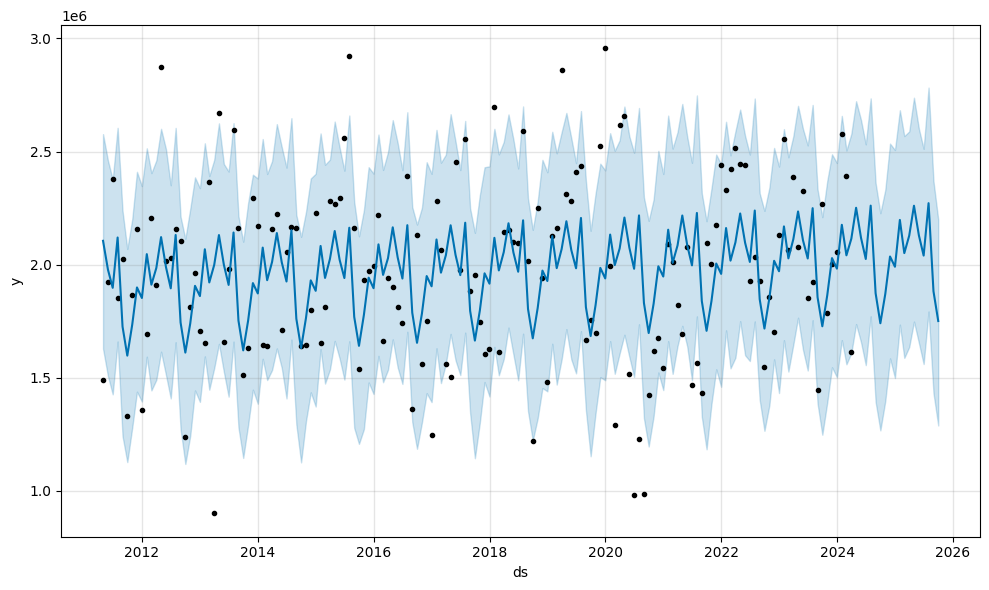

In [10]:
# Create the time range for the forecast
future_fcst = model.make_future_dataframe(periods=18,freq='ME',include_history=True)
print(future_fcst.tail(20))

# Make prediction
forecast_baseline = model.predict(future_fcst)
#print(forecast_baseline.tail(20))
# Visualize the forecast
model.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

# Visualize the forecast components
#model.plot_components(forecast_baseline)

#plt.show()
#check the model's accuracy

mean_squared_error_b = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat']))
print(mean_squared_error_b)

In [11]:
# Add seasonality # Events
model_season = Prophet(yearly_seasonality=True)

# Fit the model on the training dataset
model_season.fit(bcm_train_prophet)
bcm_test_fcst_season = model_season.predict(bcm_test_prophet)

#print(bcm_test_fcst_season.head())
#print(bcm_test_fcst.head())
#print()

#check the model's accuracy

mean_squared_error_season = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],y_pred=bcm_test_fcst_season['yhat']))

print("mean_squared_error:", mean_squared_error_b)
print("mean_squared_error_season:", mean_squared_error_season)


20:13:12 - cmdstanpy - INFO - Chain [1] start processing
20:13:12 - cmdstanpy - INFO - Chain [1] done processing


mean_squared_error: 329577.03391705675
mean_squared_error_season: 329577.03391705675


In [12]:
# COVID withdow
COVID = pd.DataFrame({
  'holiday':'COVID',
  'ds':pd.to_datetime(['2020-03-31']),
  'lower_window':-15,
  'upper_window':365,
})

# boycott window
boycott = pd.DataFrame({
    'holiday': 'boycott',
    'ds': pd.to_datetime(['2014-04-30']),
    'lower_window': -15,
    'upper_window': 365,    
})

# Combine all events
events = pd.concat((COVID, boycott))
# Take a look at the events data
print(events)


   holiday         ds  lower_window  upper_window
0    COVID 2020-03-31           -15           365
0  boycott 2014-04-30           -15           365


In [13]:
# Format data for prophet model using ds and y & regressor
multi_train = bcm_train[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                                  ,'TOT_PAID':'y'
                                                                                                  ,'BUDGET_AMT':'bud'
                                                                                                  ,'NBR_MURDER':'case'})
multi_test  =  bcm_test[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                       ,'TOT_PAID':'y'
                                                                                       ,'BUDGET_AMT':'bud'
                                                                                       ,'NBR_MURDER':'case'})

# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True)


# Add regressor
model_multivariate.add_regressor('bud', standardize=False)
model_multivariate.add_regressor('case', standardize=False)

# Fit the model on the training dataset
model_multivariate.fit(multi_train)
multi_test_prdct = model_multivariate.predict(multi_test)
multi_train_prdct = model_multivariate.predict(multi_train)

#check the model's accuracy

mean_squared_error_multi = np.sqrt(mean_squared_error(y_true=multi_test['y'],y_pred=multi_test_prdct['yhat']))

print("mean_squared_error:", mean_squared_error_b)
print("mean_squared_error_season:", mean_squared_error_season)
print("mean_squared_error_multi:", mean_squared_error_multi)

print(bcm_train.columns)
print("multi_prdct_train",multi_train_prdct.columns)
print("multi_prdct_test",multi_test_prdct.columns)

#https://www.kaggle.com/code/pythonafroz/fb-prophet-with-multiple-regressors

20:13:12 - cmdstanpy - INFO - Chain [1] start processing
20:13:12 - cmdstanpy - INFO - Chain [1] done processing
20:13:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:13:12 - cmdstanpy - INFO - Chain [1] start processing
20:13:13 - cmdstanpy - INFO - Chain [1] done processing


mean_squared_error: 329577.03391705675
mean_squared_error_season: 329577.03391705675
mean_squared_error_multi: 294803.01552720077
Index(['FISCAL_YEAR', 'ACCOUNTING_PERIOD', 'TOT_PAID', 'BUDGET_AMT',
       'NBR_CASE', 'NBR_MURDER', 'NBR_OTHER'],
      dtype='object')
multi_prdct_train Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'bud',
       'bud_lower', 'bud_upper', 'case', 'case_lower', 'case_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
multi_prdct_test Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'bud',
       'bud_lower', 'bud

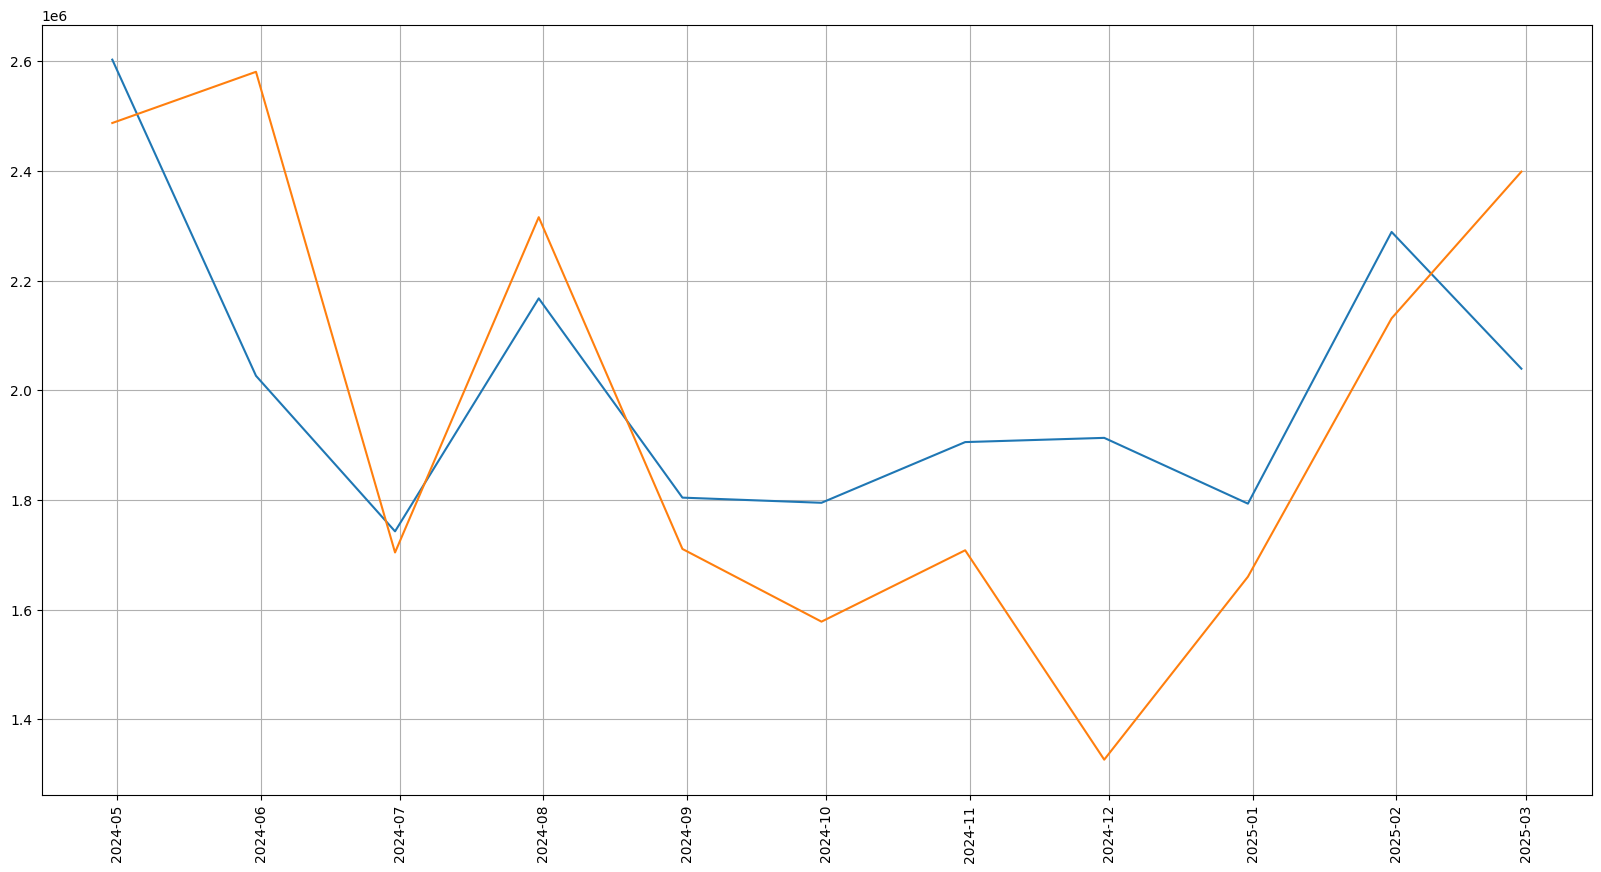

In [14]:
# plot Prediction vs Actual in Test period
plt.figure(figsize=(20, 10))
plt.plot(multi_test_prdct['ds'],multi_test_prdct['yhat'])
plt.plot(multi_test['ds'],multi_test['y'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

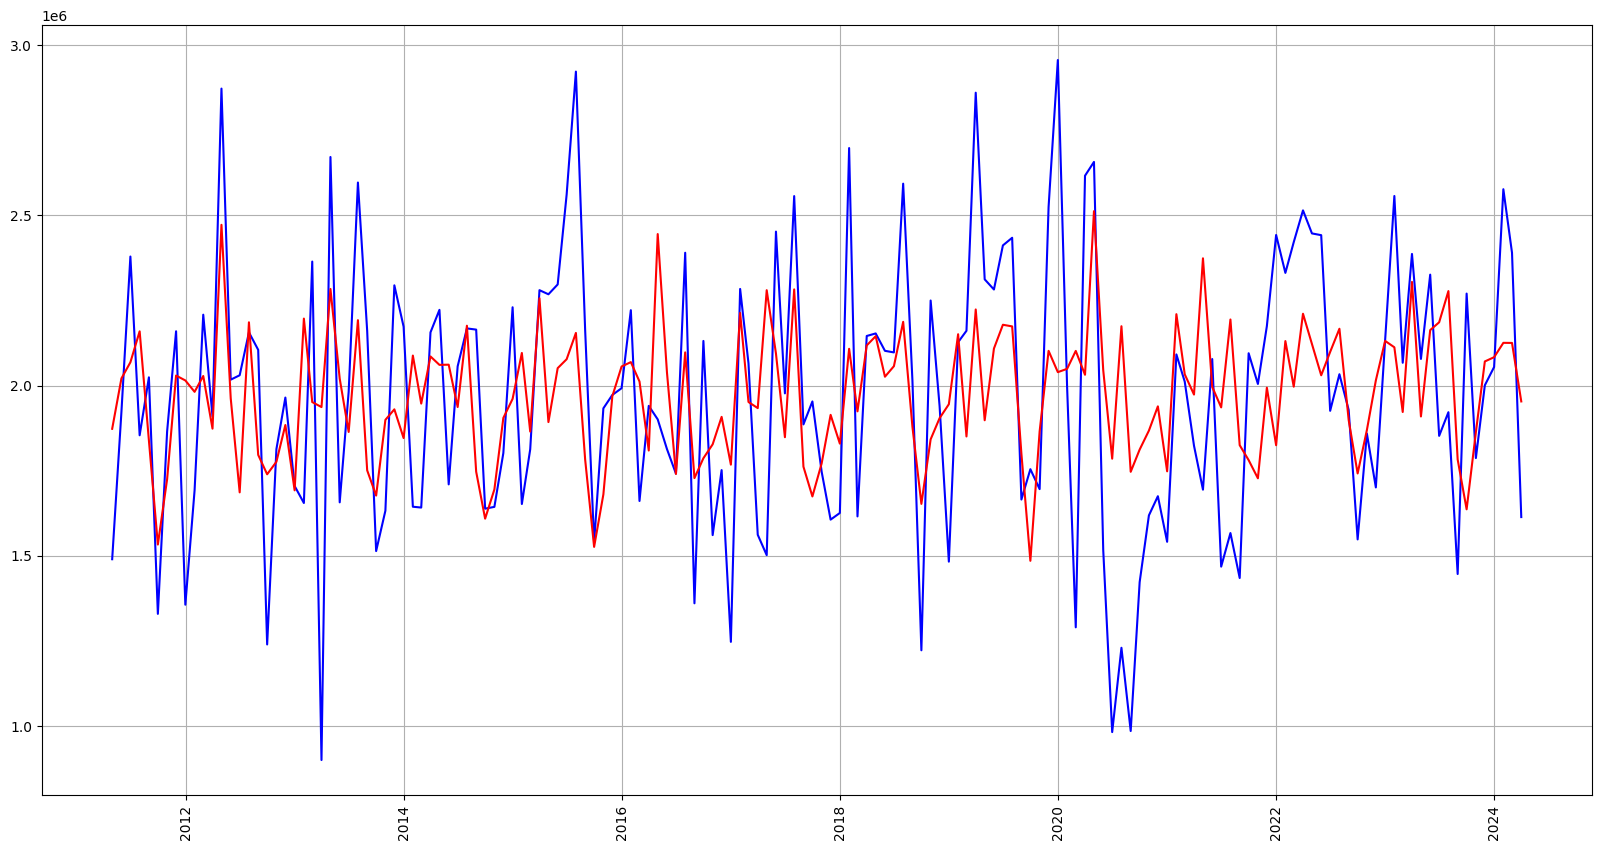

In [15]:
# plot Prediction vs Actual in train period
plt.figure(figsize=(20, 10))

plt.plot(bcm_train_prophet['ds'],bcm_train['TOT_PAID'],color='b')
plt.plot(multi_train_prdct['ds'],multi_train_prdct['yhat'],color='r')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

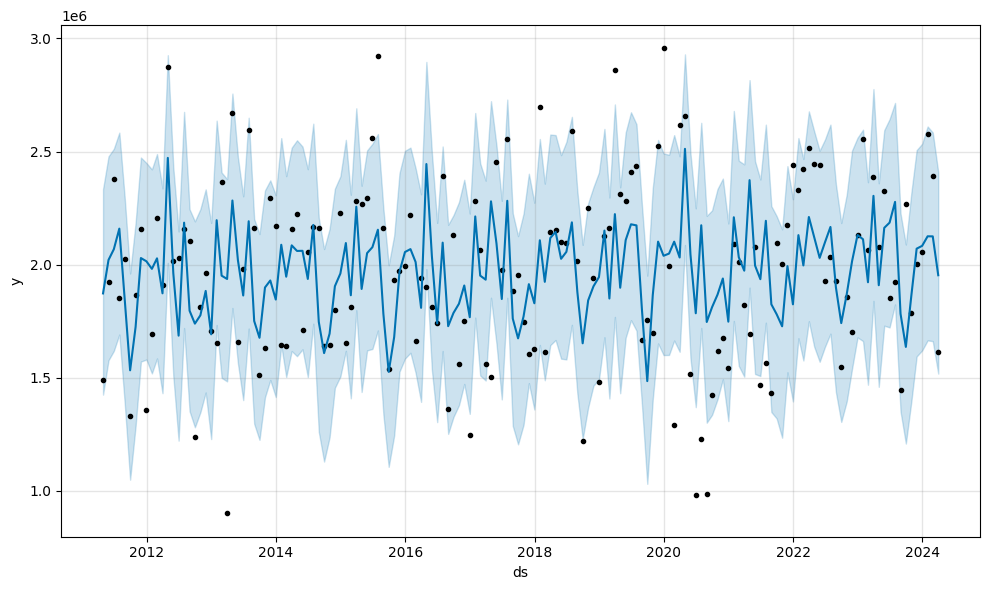

In [16]:
model_multivariate.plot(multi_train_prdct);


20:13:13 - cmdstanpy - INFO - Chain [1] start processing
20:13:14 - cmdstanpy - INFO - Chain [1] done processing
20:13:14 - cmdstanpy - INFO - Chain [1] start processing
20:13:14 - cmdstanpy - INFO - Chain [1] done processing


Text(0, 0.5, 'Case Managers Budget')

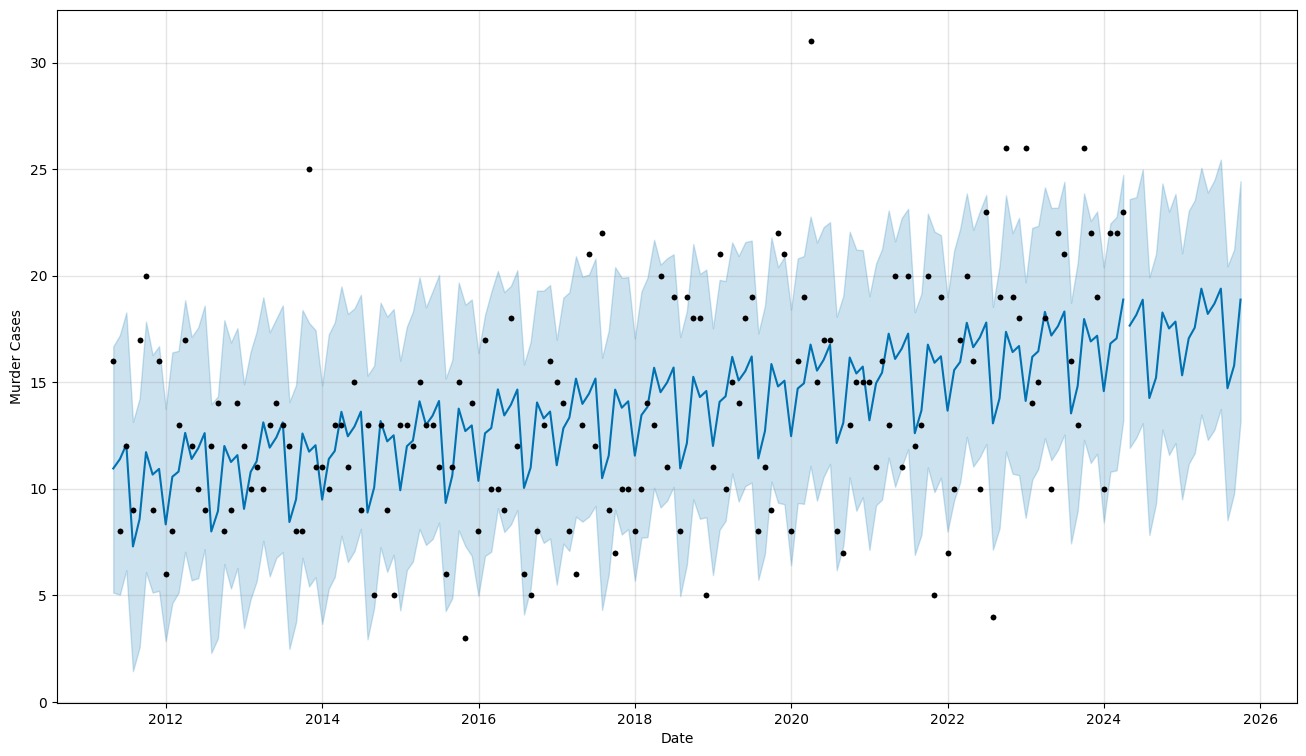

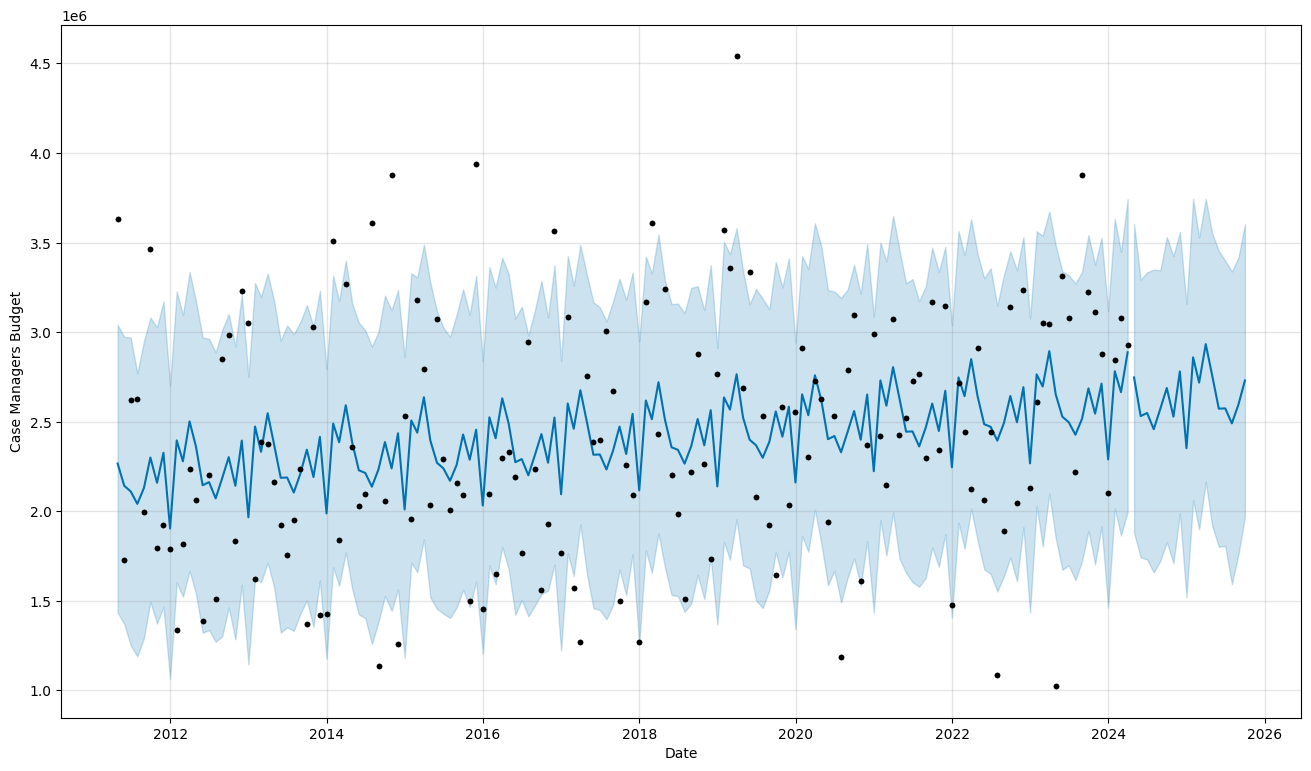

In [17]:

#forecsst the 1st regressor
#########################################################################################
train_case_p = multi_train[["ds","case"]].rename(columns={"case":"y"})
#test_case_p = multi_train[["ds","case"]].rename(columns={"case":"y"})
model_case = Prophet(yearly_seasonality=True)
model_case.fit(train_case_p)
train_case_prdct = model_case.predict(train_case_p)
#test_case_prdct = model_case.predict(test_case_p)
case_future = model_case.make_future_dataframe(periods=18,freq='ME',include_history=False)
case_future_prdct = model_case.predict(case_future)

f, ax = plt.subplots(figsize=(16,9))
plot1 = model_case.plot(train_case_prdct, ax=ax);
plot1 = model_case.plot(case_future_prdct, ax=ax);
ax.set_xlabel('Date')
ax.set_ylabel('Murder Cases')


#########################################################################################
#forecsst the 2nd regressor
#########################################################################################
train_bud_p = multi_train[["ds","bud"]].rename(columns={"bud":"y"})
model_bud = Prophet(yearly_seasonality=True)
model_bud.fit(train_bud_p)
train_bud_prdct = model_bud.predict(train_bud_p)

#set the forecasting length
bud_future = model_bud.make_future_dataframe(periods=18,freq='ME',include_history=False)
bud_future_prdct = model_bud.predict(bud_future)

#ploting both trend and forecast in one graph
f, ax = plt.subplots(figsize=(16,9))
plot1 = model_bud.plot(train_bud_prdct , ax=ax);
plot1 = model_bud.plot(bud_future_prdct, ax = ax);
ax.set_xlabel('Date')
ax.set_ylabel('Case Managers Budget')




MSE: Time Series with Budget and Murder Cases as regressors: 294803.01552720077


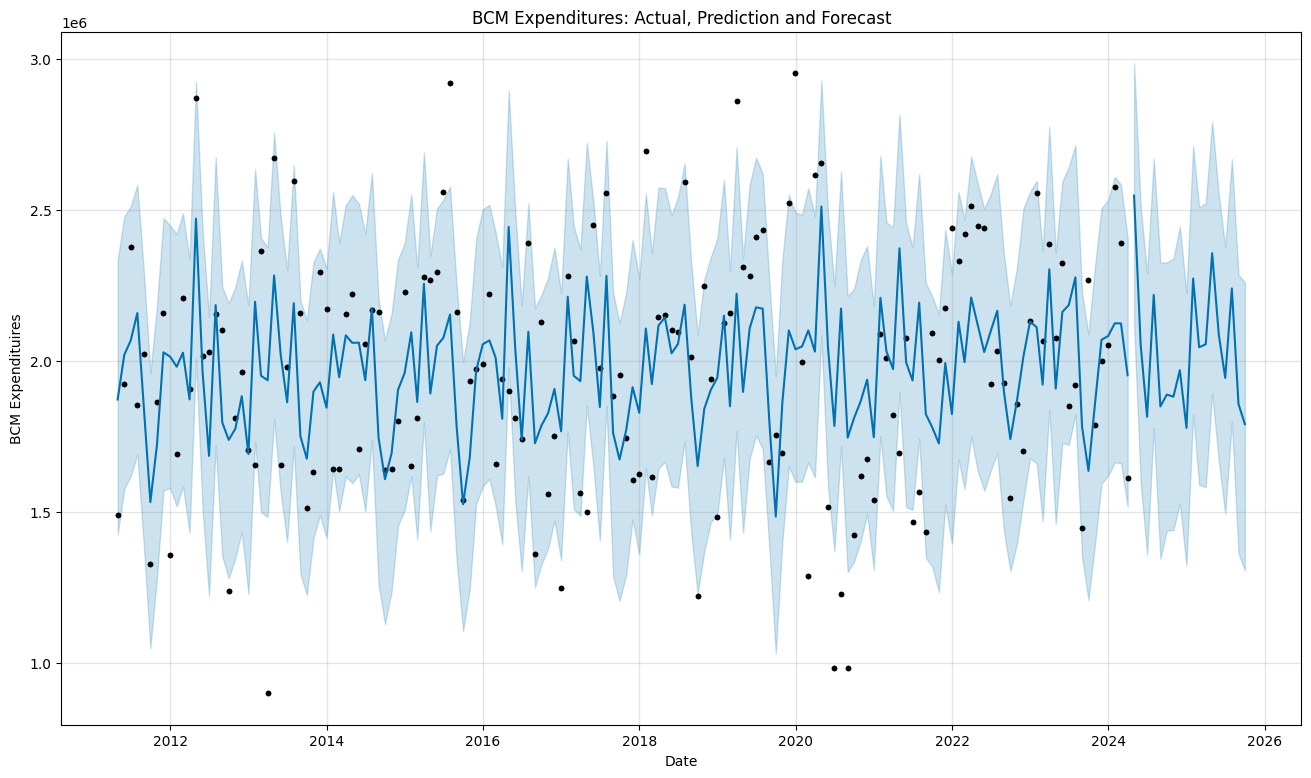

In [18]:
mulit_future = model_multivariate.make_future_dataframe(periods = 18, freq='ME', include_history=True)

mulit_future['case'] = multi_train['case']
mulit_future['bud'] = multi_train['bud']

#Prep the regressors for forecasting the Actual Expense
case_future_prdc_2 = case_future_prdct[['ds','yhat']].rename(columns={"yhat":"yhat_case"})
bud_future_prdc_2 = bud_future_prdct[['ds','yhat']].rename(columns={"yhat":"yhat_bud"})

df_merge = pd.merge(case_future_prdc_2,bud_future_prdc_2,on='ds')

multi_future = pd.merge(df_merge,mulit_future,on='ds')

multi_future.fillna({'case':multi_future['yhat_case'],
                   'bud' :multi_future['yhat_bud']},inplace=True)
multi_future.drop(['yhat_case','yhat_bud'],inplace=True, axis=1)

mulit_future_prdct = model_multivariate.predict(multi_future)

f, ax = plt.subplots(figsize=(16,9))
plot1 = model_multivariate.plot(mulit_future_prdct,ax=ax)
plot1 = model_multivariate.plot(multi_train_prdct,ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("BCM Expendituires")
ax.set_title("BCM Expenditures: Actual, Prediction and Forecast")

mean_squared_error_b = np.sqrt(mean_squared_error(y_true=multi_test['y'],
                   y_pred=multi_test_prdct['yhat']))
print("MSE: Time Series with Budget and Murder Cases as regressors:",mean_squared_error_b)


In [21]:
mulit_future_prdct[['ds','yhat']].tail(18)

,ds,yhat
0,2024-04-30,2.548417e+06
1,2024-05-31,2.053841e+06
2,2024-06-30,1.815772e+06
3,2024-07-31,2.219484e+06
4,2024-08-31,1.850085e+06
5,2024-09-30,1.889219e+06
6,2024-10-31,1.882500e+06
7,2024-11-30,1.969913e+06
8,2024-12-31,1.778898e+06
9,2025-01-31,2.273807e+06


In [22]:
# COVID withdow
COVID = pd.DataFrame({
  'holiday':'COVID',
  'ds':pd.to_datetime(['2020-03-31']),
  'lower_window':-1,
  'upper_window':1,
})

# boycott window
boycott = pd.DataFrame({
    'holiday': 'boycott',
    'ds': pd.to_datetime(['2014-04-30']),
    'lower_window': -1,
    'upper_window': 1,    
})

# Combine all events
events = pd.concat((COVID, boycott))
# Take a look at the events data
print(events)

# Add holidays
model_holiday = Prophet(yearly_seasonality=True)

#Add built-in country holidays

model_holiday.add_country_holidays(country_name='US')
print(model_holiday.train_holiday_names)



   holiday         ds  lower_window  upper_window
0    COVID 2020-03-31            -1             1
0  boycott 2014-04-30            -1             1
None
